# Created By: Alec Schonfeld

# Date: 5/19/2024

# Business Understanding

***

## Project Prompt

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

## Goal

Find the variables that make an airplane the safest and provide business recommendations based on these findings

# Data Understanding

***

## Dataset Overview

Summary: The dataset contains records of aircraft crashes between 1948 - 2022. The data from 1948 -1982 is limited so we drop those data points to focus on the majority of the volume following 1982. Data points include the number of engines, seveirty of passenger injuries, severity of aircraft damage,and more. 

Important Data Columns: 

1. Aircraft Make and Model: Information about the specific make and model of the aircraft involved in each incident.

2. Aircraft Damage: The severity of the damage to the aircraft

3. Severity of Injuries: A count for each incident on the number of uninjured, minor, serious, and fatal injuries. 

4. Engine Type: The type of engine on the aircraft

5. Num of Engines: The number of engines on an airplane. The mean is 1 but can range from 1 - 8. 

# Data Preparation

## Step 1: Load and Explore Dataset

In [4]:
#Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline   

In [5]:
#Load and print head of Aviation Datasets ('AviationData.csv', 'USState_Codes.csv')

df = pd.read_csv('aviation_data.csv', encoding='ISO-8859-1', low_memory=False)

df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [6]:
# Explore the shape of the dataset

df.shape

(88889, 31)

In [7]:
# Evaluate the column headers

df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [8]:
# understand the data types, counts, and null values 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

***

## Missing Values

There are several columns that have significant missing values: Latitude, Longitude, Airport.Code, Airport.Name, Aircraft.Category, FAR.Description, Schedule, Air.carrier, Broad.phase.of.flight

In [9]:
# Get descriptive statistics for the dataset

df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


## Takeaways from describe output of dataset

1. Number of engines
- Majority of the time there is one engine in an airplane as this was the value for the 25%, 50% , and 75% quartile
- The max # of engines is 8

2. Injury Columns
- Injuries are broken into 4 distinct columns based on the severity: Fatal, Serious, Minor, Uninjured

***

# Cleaning Data

In [11]:
#Identify missing values across dataframe columns 

df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [12]:
#Identify columns with more than 25% of missing data and add them to a list

(df['FAR.Description'].isna().sum()/len(df)) * 100

columns_to_drop=[]
for x in df:
    if (df[x].isna().sum() / len(df[x])) * 100 > 25:
        columns_to_drop.append(x)
print(columns_to_drop)
   

['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'FAR.Description', 'Schedule', 'Air.carrier', 'Broad.phase.of.flight']


Dropping columns missing more than 25% to ensure there is a significant amount of data populated in columns that we analyze

In [13]:
#Drop columns from dataframe that are missing too much data

df_new = df.drop(columns= columns_to_drop)
df_new.columns


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')

In [14]:
#Exploring unique column values

print('Investigation Type:',df['Investigation.Type'].unique())
print('Aircraft damage:',df['Aircraft.damage'].unique())
print('Engine Type:',df['Engine.Type'].unique())

Investigation Type: ['Accident' 'Incident']
Aircraft damage: ['Destroyed' 'Substantial' 'Minor' nan 'Unknown']
Engine Type: ['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']


In [15]:
# Explore different airplane makes

df_new['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

In [16]:
#Clean data amongst same make but different spelling 

df_new['Make'] = df_new['Make'].str.title()
df_new['Make'].value_counts()

Make
Cessna           27149
Piper            14870
Beech             5372
Boeing            2745
Bell              2722
                 ...  
Cohen                1
Kitchens             1
Lutes                1
Izatt                1
Royse Ralph L        1
Name: count, Length: 7587, dtype: int64

In [17]:
#Clean values in Weather Condition column

df_new['Weather.Condition'] = df_new['Weather.Condition'].str.title()
df_new['Weather.Condition'].value_counts()

Weather.Condition
Vmc    77303
Imc     5976
Unk     1118
Name: count, dtype: int64

In [18]:
# Explore different types of airplane models

df_new['Model'].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

In [19]:
# Explore values in the damage count column

damage_count = df_new['Aircraft.damage'].value_counts()
damage_count

Aircraft.damage
Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: count, dtype: int64

In [20]:
# Explore different types of engines

engine_type = df_new['Engine.Type'].value_counts()
engine_type

Engine.Type
Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
Geared Turbofan       12
Electric              10
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: count, dtype: int64

***

# Exploratory Data Analysis

Text(0.5, 0, 'Severity of Damage')

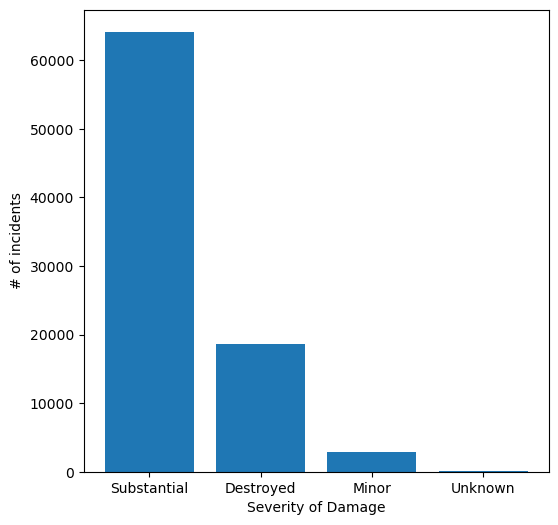

In [22]:
# Visualizing the breakdown of damage across airplane crashes
#Exploratory-Data-Analysis
fig, ax = plt.subplots(figsize= (6,6))

ax.bar(damage_count.index,damage_count.values)
ax.set_ylabel('# of incidents')
ax.set_xlabel('Severity of Damage')

- The majority of accidents resulted in substantial damage 

In [23]:
#Group model and aircraft damage data to create a bar chart of damage across models
damage_by_model = df_new.groupby(['Model','Aircraft.damage']).size().unstack(fill_value=0)
damage_by_model['Total']= damage_by_model.sum(axis=1)
damage_by_model_sorted = damage_by_model.sort_values(by='Total',ascending=False)


# Filter for the top 10 models by volume
top_10_damage_by_model=damage_by_model_sorted.head(10)
top_10_damage_by_model=top_10_damage_by_model.drop(columns=['Total'])
top_10_damage_by_model

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Model,,,,
152,365,29,1958,2
172,207,9,1514,4
172N,236,7,910,0
PA-28-140,223,5,699,1
150,128,10,682,1
172M,146,11,638,2
172P,135,5,547,0
182,118,8,526,2
180,51,3,566,1


Lets evaluate the breakdown of damage across different airplane models

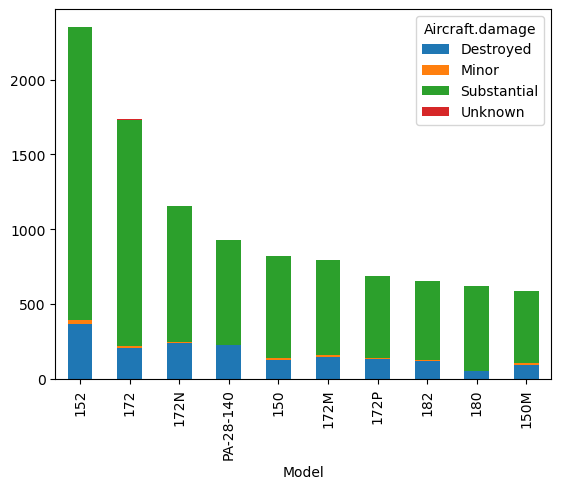

In [24]:
# Visualizing the damage breakdown across different airplane models

top_10_damage_by_model.plot(kind='bar',stacked=True)
plt.show()

- We can begin to see the breakdown of damage across different airplane models but it is hard to tell on a % basis which plane is most durable during an accident

In [28]:
#Group make and aircraft damage data to create a bar chart of damage across airplane makes
damage_by_make = df_new.groupby(['Make','Aircraft.damage']).size().unstack(fill_value=0)
damage_by_make['Total']= damage_by_make.sum(axis=1)
damage_by_make_sorted = damage_by_make.sort_values(by='Total',ascending=False)

# Filter to the top 10 
top_10_damage_by_make = damage_by_make_sorted.head(10)
top_10_damage_by_make = top_10_damage_by_make.drop(columns=['Total'])
top_10_damage_by_make

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Make,,,,
Cessna,5202,387,21268,38
Piper,3428,204,11100,15
Beech,1585,170,3539,5
Bell,708,47,1900,5
Boeing,170,711,739,11
Mooney,373,24,923,3
Robinson,282,8,916,4
Grumman,299,18,845,0
Bellanca,233,7,800,0


In [29]:
# Convert values into percentages so you can compare damage in an apples to apples comparison

# Find the sum of the row
row_sums = top_10_damage_by_make.sum(axis=1)

# Divide each value by its row sum and multiply by 100
top_10_damage_by_make_percentage = top_10_damage_by_make.div(row_sums, axis=0) * 100

column_order = ['Destroyed','Substantial','Minor']

top_10_damage_by_make_percentage = top_10_damage_by_make_percentage.loc[:,column_order]

# Display the resulting DataFrame
print(top_10_damage_by_make_percentage)


Aircraft.damage  Destroyed  Substantial      Minor
Make                                              
Cessna           19.341885    79.077896   1.438929
Piper            23.245406    75.269546   1.383332
Beech            29.911304    66.786186   3.208152
Bell             26.616541    71.428571   1.766917
Boeing           10.423053    45.309626  43.592888
Mooney           28.193500    69.765684   1.814059
Robinson         23.305785    75.702479   0.661157
Grumman          25.731497    72.719449   1.549053
Bellanca         22.403846    76.923077   0.673077
Hughes           20.697168    78.213508   1.089325


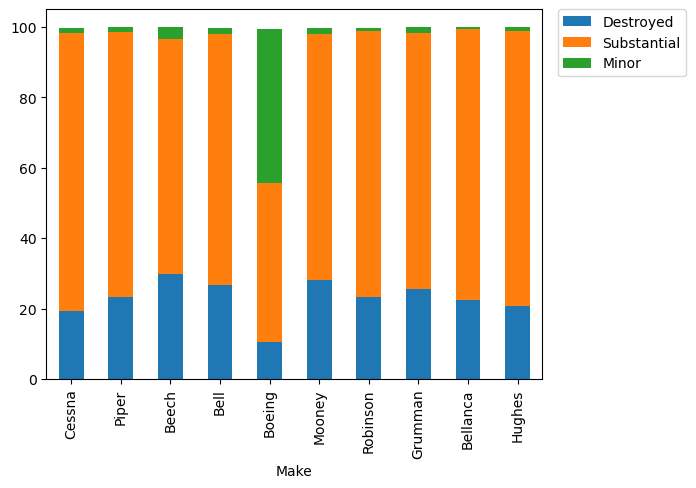

In [30]:
#Visulize the top 10 airplane makes by severity of damage

top_10_damage_by_make_percentage.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.29,1),loc='upper right',borderaxespad=0)

plt.show()

Takaways from the above graph
- Beech has the highest % of destroyed aircrafts
- Cessna has the highest % of substantially damaged aircrafts
- Boeing seems to have the safest planes with the highest % of minor damage

In [31]:
df_new['Event.Date']

0        1948-10-24
1        1962-07-19
2        1974-08-30
3        1977-06-19
4        1979-08-02
            ...    
88884    2022-12-26
88885    2022-12-26
88886    2022-12-26
88887    2022-12-26
88888    2022-12-29
Name: Event.Date, Length: 88889, dtype: object

- We will drop values before 1982 since it is a long time ago and there is limited data during that time

In [37]:
#Converting the event date column to a date dtype and extracting the year and month

df_new['Event.Date'] = pd.to_datetime(df['Event.Date'])
df_new['Year'] = df_new['Event.Date'].dt.year
df_new['Month'] = df_new['Event.Date'].dt.month

In [35]:
#drop values before 1982 since there is limited data

df_new = df_new[df_new['Year'] >=1982]
df_new['Year']

#Group by year and sum number of crashes 
yearly_crashes = df_new.groupby('Year').size()
yearly_crashes

Year
1982    3593
1983    3556
1984    3457
1985    3096
1986    2880
1987    2828
1988    2730
1989    2544
1990    2518
1991    2462
1992    2355
1993    2313
1994    2257
1995    2309
1996    2187
1997    2148
1998    2226
1999    2209
2000    2220
2001    2063
2002    2020
2003    2085
2004    1952
2005    2031
2006    1851
2007    2016
2008    1893
2009    1783
2010    1786
2011    1850
2012    1835
2013    1561
2014    1535
2015    1582
2016    1664
2017    1638
2018    1681
2019    1624
2020    1392
2021    1545
2022    1607
dtype: int64

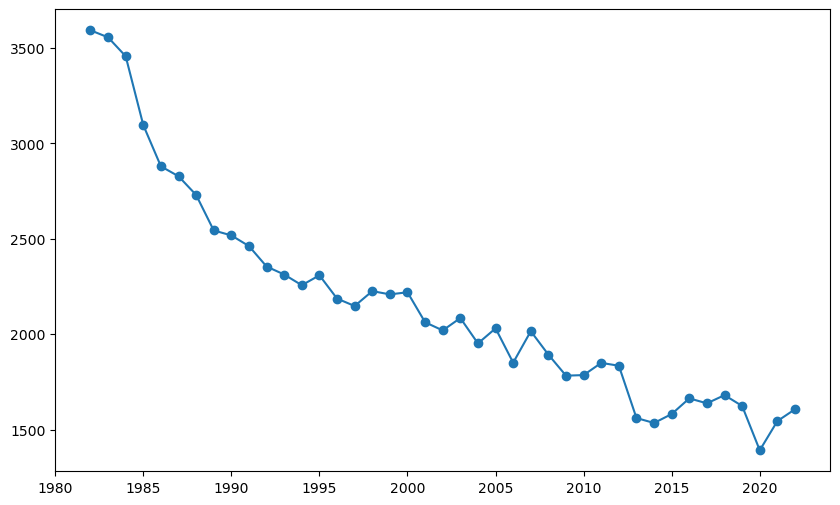

In [36]:
#crashes over the years

plt.figure(figsize=(10, 6))  # You can adjust the size as needed
plt.plot(yearly_crashes.index, yearly_crashes.values, marker='o')  # 'o' adds circle markers

In [38]:
df_new.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6083
Engine.Type                7095
Purpose.of.flight          6191
Total.Fatal.Injuries      11400
Total.Serious.Injuries    12508
Total.Minor.Injuries      11931
Total.Uninjured            5911
Weather.Condition          4492
Report.Status              6384
Publication.Date          13770
Year                          0
Month                         0
dtype: int64

In [39]:
#Exploring Weather Data 

weather_group = df_new['Weather.Condition'].value_counts()
print(weather_group.values)

[77301  5973  1116]


C:\Users\alecs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alecs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\alecs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Weather.Condition'>

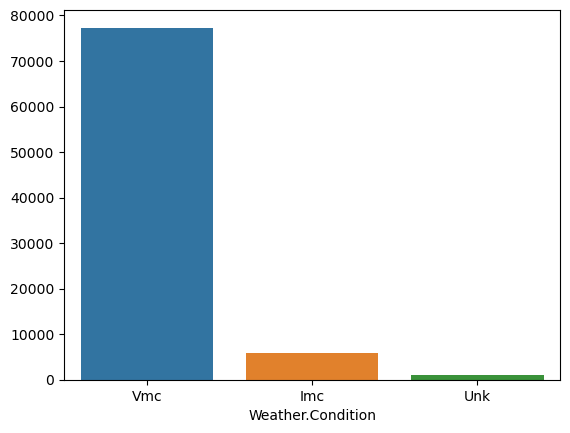

In [40]:
sns.barplot(x=weather_group.index, y=weather_group.values)


In [41]:
# Grouping weather data with damage history

weather_injuries = df_new.groupby('Weather.Condition')[['Total.Fatal.Injuries',
'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].count()

weather_injuries

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Weather.Condition,,,,
Imc,5585,5115,5091,5268
Unk,1017,1000,1001,1045
Vmc,66699,66203,66826,72498




Since there is skewed data with 90%+ of data representing Vmc weather there is not much to explore here

In [42]:
# Exploring crashes with serious / fatal injuries vs Total.Fatal.Injuries',
#'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured

injuries = df_new.groupby('Make')[['Total.Fatal.Injuries',
'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].count()

#identify top 10 makes by injuries
injuries['Total'] = injuries.sum(axis=1)
injuries_sorted = injuries.sort_values(by=['Total'],ascending=False)
injuries_sorted_top_10 = injuries_sorted.head(10)
injuries_sorted_top_10_final= injuries_sorted_top_10.drop(columns=['Total'])


injuries_sorted_top_10_final

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
Cessna,23809,23450,23725,25698
Piper,13194,12933,13004,14015
Beech,4795,4609,4620,4933
Bell,2352,2339,2360,2501
Boeing,2270,2313,2289,2581
Mooney,1157,1125,1147,1225
Grumman,1077,1073,1081,1128
Robinson,958,917,942,1083
Bellanca,924,919,936,988


In [43]:
# Convert values into percentages for an easy comparative visual

Total = injuries_sorted_top_10_final.sum(axis = 1)

injuries_percentage = injuries_sorted_top_10_final.div(Total,axis=0)
injuries_percentage

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Make,,,,
Cessna,0.246261,0.242548,0.245392,0.265799
Piper,0.248260,0.243349,0.244684,0.263708
Beech,0.252941,0.243129,0.243709,0.260220
Bell,0.246231,0.244870,0.247069,0.261830
Boeing,0.240135,0.244684,0.242145,0.273035
Mooney,0.248603,0.241728,0.246455,0.263214
Grumman,0.247075,0.246157,0.247993,0.258775
Robinson,0.245641,0.235128,0.241538,0.277692
Bellanca,0.245288,0.243961,0.248474,0.262278


Text(0, 0.5, 'Percentage of Type of Injuries')

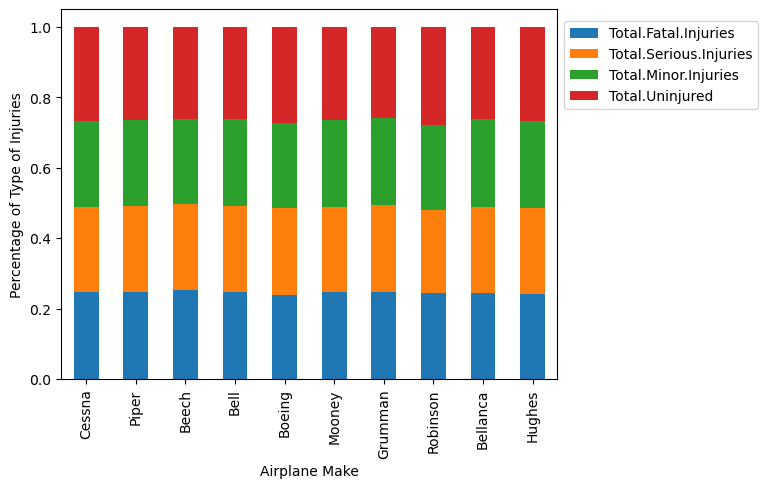

In [44]:
# Visaulize the types of injuries sustained compared to different airplane manufacturers
ax= injuries_percentage.plot(kind='bar',stacked='True')
ax.legend(loc='center left', bbox_to_anchor=(1, .85), ncol=1)
plt.xlabel('Airplane Make')
plt.ylabel('Percentage of Type of Injuries')

Graph Takeaways 
- There seems to be little difference in the % of injuries sustained across airplane makes

Let's explore if there are certain models for each make that have a higher % of substanstial injuries

## Exploring Correlation Between Engine Types and Severity of Accidents

In [45]:
# Grouping engine types and airplane damage to look for a correlation

engine_accidents = df_new.groupby('Engine.Type')[['Total.Fatal.Injuries',
'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']].count()

engine_accidents

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,
Electric,10,10,10,10
Geared Turbofan,12,12,12,12
Hybrid Rocket,1,1,1,1
LR,2,2,2,2
NONE,2,2,2,2
Reciprocating,60837,60060,60702,65244
Turbo Fan,1994,2062,2026,2416
Turbo Jet,590,588,581,668
Turbo Prop,2870,2753,2790,3121


In [46]:
engine_accidents['Total'] = engine_accidents.sum(axis=1)
engine_accidents = engine_accidents.sort_values(by=['Total'],ascending=False)
engine_accidents_sorted_top_10 = engine_accidents.head(10)
engine_accidents_final= engine_accidents_sorted_top_10.drop(columns=['Total'])

engine_accidents_final

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,
Reciprocating,60837,60060,60702,65244
Turbo Shaft,3040,3035,3081,3323
Turbo Prop,2870,2753,2790,3121
Turbo Fan,1994,2062,2026,2416
Unknown,1901,1873,1877,1926
Turbo Jet,590,588,581,668
Geared Turbofan,12,12,12,12
Electric,10,10,10,10
LR,2,2,2,2


In [47]:
Total = engine_accidents_final.sum(axis = 1)

engine_percentage = engine_accidents_final.div(Total,axis=0)
engine_percentage

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
Engine.Type,,,,
Reciprocating,0.246460,0.243313,0.245913,0.264314
Turbo Shaft,0.243609,0.243209,0.246895,0.266287
Turbo Prop,0.248830,0.238686,0.241894,0.270591
Turbo Fan,0.234643,0.242645,0.238409,0.284302
Unknown,0.250891,0.247195,0.247723,0.254190
Turbo Jet,0.243098,0.242274,0.239390,0.275237
Geared Turbofan,0.250000,0.250000,0.250000,0.250000
Electric,0.250000,0.250000,0.250000,0.250000
LR,0.250000,0.250000,0.250000,0.250000


Text(0, 0.5, 'Percentage of Type of Injuries')

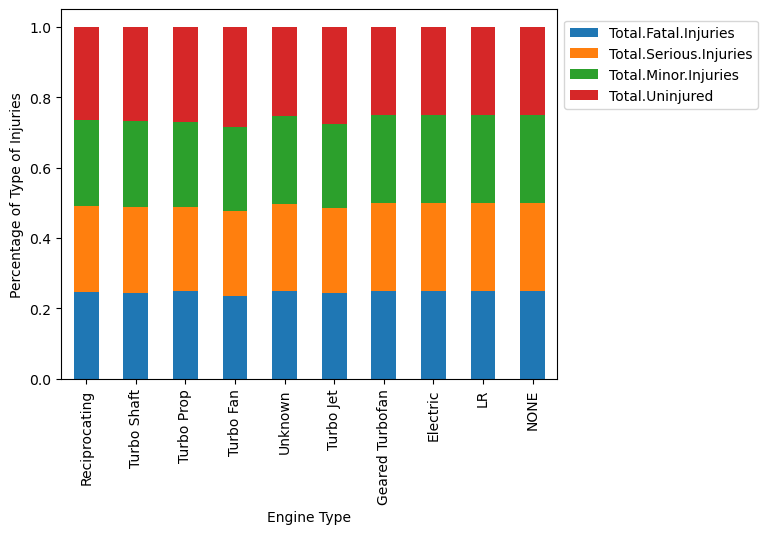

In [48]:
# Visaulize the types of injuries sustained compared to different engine types
ax= engine_percentage.plot(kind='bar',stacked='True')
ax.legend(loc='center left', bbox_to_anchor=(1, .85), ncol=1)
plt.xlabel('Engine Type')
plt.ylabel('Percentage of Type of Injuries')

***

- There seems to be little difference in correlation between sevrity of accident and engine type

## Exploring Correlation Between Engine Type and Aircraft Damage

In [49]:
# Grouping engine types and airplane damage to look for a correlation

engine_damage = df_new.groupby('Engine.Type')['Aircraft.damage'].value_counts().unstack(fill_value=0)
engine_damage['Total'] = engine_damage.sum(axis=1)
engine_damage_sort = engine_damage.sort_values(by='Total', ascending = False)
engine_damage_sorted = engine_damage_sort[engine_damage_sort['Total'] >= 10]
engine_damage_drop=engine_damage_sorted.drop(columns=['Total'])
engine_damage_drop

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Engine.Type,,,,
Reciprocating,14524,853,53805,6
Turbo Shaft,879,91,2549,0
Turbo Prop,807,306,2035,0
Unknown,544,132,1133,0
Turbo Fan,196,670,729,0
Turbo Jet,140,162,234,0
Electric,2,0,8,0


In [50]:

Total_engine = engine_damage_drop.sum(axis = 1)
engine_damage_updated = engine_damage_drop.div(Total_engine,axis=0)
engine_damage_updated

Aircraft.damage,Destroyed,Minor,Substantial,Unknown
Engine.Type,,,,
Reciprocating,0.209921,0.012329,0.777664,0.000087
Turbo Shaft,0.249787,0.025860,0.724354,0.000000
Turbo Prop,0.256353,0.097205,0.646442,0.000000
Unknown,0.300719,0.072968,0.626313,0.000000
Turbo Fan,0.122884,0.420063,0.457053,0.000000
Turbo Jet,0.261194,0.302239,0.436567,0.000000
Electric,0.200000,0.000000,0.800000,0.000000


Text(0, 0.5, 'Percentage of Aircraft Damage')

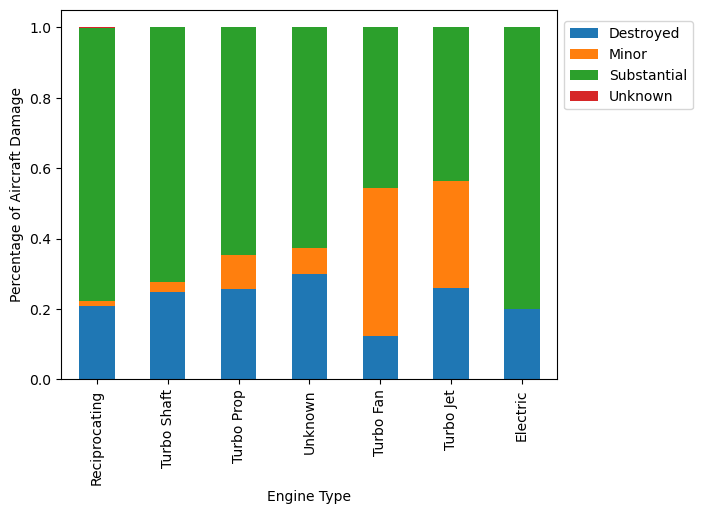

In [51]:
# Visaulize the types of injuries sustained compared to different engine types
ax= engine_damage_updated.plot(kind='bar',stacked='True')
ax.legend(loc='center left', bbox_to_anchor=(1, .85), ncol=1)
plt.xlabel('Engine Type')
plt.ylabel('Percentage of Aircraft Damage')

Engine Type and Aircraft Damage Graph Takeaways
1. The Turbo Fan and Turbo Jet have by far the highest percentage of minor aircraft damage across engine types
2. Electric engines seem the most dangerous with the highest percentage of substantial damage


## Exploring Correlation Between # of Engines and Aircraft Damage

In [52]:
# Grouping number of engines and airplane damage to look for a correlation

num_engine_damage = df_new.groupby('Number.of.Engines')['Aircraft.damage'].value_counts().unstack(fill_value=0)
num_engine_damage['Total'] = num_engine_damage.sum(axis=1)
num_engine_damage_sort =num_engine_damage.sort_values(by='Total', ascending = False)
num_engine_damage_updated=num_engine_damage_sort.drop(columns=['Total','Unknown'])
num_engine_damage_updated

Aircraft.damage,Destroyed,Minor,Substantial
Number.of.Engines,,,
1.0,13857,726,54565
2.0,2871,1095,5867
0.0,173,74,842
3.0,25,197,104
4.0,58,145,114
8.0,0,0,2
6.0,0,0,1


In [53]:
# Changing table results to percentage for better interpratation

Total_num = num_engine_damage_updated.sum(axis=1)
num_engine_total_updated = num_engine_damage_updated.div(Total_num,axis=0)
num_engine_total_updated

Aircraft.damage,Destroyed,Minor,Substantial
Number.of.Engines,,,
1.0,0.200396,0.010499,0.789105
2.0,0.291976,0.111360,0.596664
0.0,0.158861,0.067952,0.773186
3.0,0.076687,0.604294,0.319018
4.0,0.182965,0.457413,0.359621
8.0,0.000000,0.000000,1.000000
6.0,0.000000,0.000000,1.000000


Text(0, 0.5, 'Percentage of Aircraft Damage')

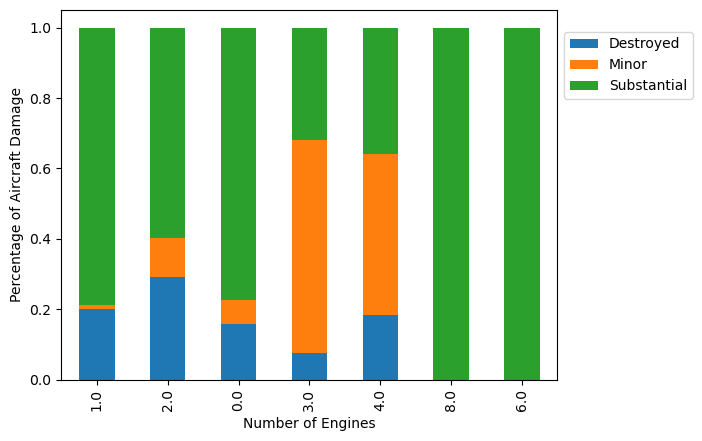

In [54]:
# Visaulize the types of injuries sustained compared to different engine types
ax= num_engine_total_updated.plot(kind='bar',stacked='True')
ax.legend(loc='center left', bbox_to_anchor=(1, .85), ncol=1)
plt.xlabel('Number of Engines')
plt.ylabel('Percentage of Aircraft Damage')

- Planes with 3 engines seem to be the safest with the highest % of minor damage during accidents

***

# Diving Deeper Into Boeing

###### We have identified that Boeing is the safest make of airplane but now let's take a look at the safest model in the Boeing aircraft lineup by analyzing the severity of damage for each model 

In [55]:
#Creating a df for Boeing to dive deeper into safety of each model
boeing = df_new['Make'] == "Boeing"
boeing_df = df_new[boeing]
boeing_df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Registration.Number,Make,...,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Publication.Date,Year,Month
50,20020917X02242,Accident,LAX82DVA10,1982-01-06,"NEAR BAKERSFIEL, CA",United States,Non-Fatal,Substantial,N59737,Boeing,...,Unknown,0.0,1.0,0.0,1.0,Imc,Probable Cause,06-01-1983,1982,1
84,20020917X01907,Accident,DCA82AA011,1982-01-13,"WASHINGTON, DC",United States,Fatal(78),Destroyed,N62AF,Boeing,...,Unknown,78.0,6.0,3.0,0.0,Imc,Probable Cause,13-01-1983,1982,1
242,20020917X02585,Accident,SEA82DA028A,1982-02-06,"MEDFORD, OR",United States,Non-Fatal,Minor,N56270,Boeing,...,Aerial Application,0.0,0.0,0.0,3.0,Vmc,Probable Cause,06-02-1983,1982,2
320,20020917X02336,Incident,LAX82IA075,1982-02-15,"ONTARIO, CA",United States,Incident,Minor,N73717,Boeing,...,Unknown,0.0,0.0,0.0,119.0,Imc,Probable Cause,15-02-1983,1982,2
344,20020917X02404,Accident,MIA82FA051,1982-02-17,"MIAMI, FL",United States,Non-Fatal,Substantial,N4734,Boeing,...,Unknown,0.0,1.0,1.0,51.0,Vmc,Probable Cause,17-02-1983,1982,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88821,20221125106357,Incident,DCA23WA075,2022-11-25,"Breslau,",Canada,Non-Fatal,NaN,C-FFLC,Boeing,...,NaN,0.0,0.0,0.0,140.0,NaN,NaN,25-11-2022,2022,11
88826,20221222106484,Incident,DCA23WA099,2022-11-26,"Bangkok,",Thailand,Non-Fatal,NaN,HS-DBO,Boeing,...,NaN,0.0,0.0,0.0,186.0,NaN,NaN,22-12-2022,2022,11
88849,20221208106433,Accident,DCA23WA091,2022-12-05,"Dortmund,",Georgia,NaN,NaN,EI-DLV,Boeing,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,2022,12
88851,20221222106485,Incident,DCA23WA100,2022-12-05,"Bangkok,",Thailand,Non-Fatal,NaN,HS-LUZ,Boeing,...,NaN,0.0,0.0,0.0,102.0,NaN,NaN,22-12-2022,2022,12


In [56]:
# Viewing the most frequently used Boeing aircrafts

boeing_df['Model'].value_counts

boeing_sorted = boeing_df['Model'].value_counts().sort_values(ascending=False)

print(boeing_sorted)

Model
737           489
A75N1         107
777            95
747            85
767            68
             ... 
727 - 221F      1
757 2B7         1
747-47UF        1
747-8F          1
737-8           1
Name: count, Length: 563, dtype: int64


In [57]:

# Calculate the counts of each model
model_counts = boeing_df['Model'].value_counts()

# Sort the models by counts and select the top 10 models
top_10_models = model_counts.head(10).index

# Filter the DataFrame to include only the top 10 models
boeing_top_10_df = boeing_df[boeing_df['Model'].isin(top_10_models)]

# Now boeing_top_10_df contains only the rows where the Model is one of the top 10 models.
boeing_top_10_df.value_counts(['Model'])

Model  
737        489
A75N1      107
777         95
747         85
767         68
757         59
737-200     53
737-300     51
B75N1       45
727-200     43
Name: count, dtype: int64

In [58]:
# Grouping the Boeing dataframe by the type of aircraft damage

boeing_grouped = boeing_top_10_df.groupby(['Model', 'Aircraft.damage']).size().unstack(fill_value=0)
boeing_grouped_2 = boeing_grouped.drop(columns='Unknown')
# Now grouped_df contains the count of each type of aircraft damage for each model.
boeing_grouped_2

Aircraft.damage,Destroyed,Minor,Substantial
Model,,,
727-200,1,17,9
737,15,124,69
737-200,12,10,11
737-300,5,13,12
747,2,38,12
757,2,14,12
767,3,17,13
777,1,32,10
A75N1,7,6,94


In [59]:
# Calculate the sum of each row
row_sum = boeing_grouped_2.sum(axis=1)

# Divide each value in the DataFrame by the sum of the row and multiply by 100
boeing_grouped_percentage = boeing_grouped_2.div(row_sum, axis=0) * 100

print(boeing_grouped_percentage)


Aircraft.damage  Destroyed      Minor  Substantial
Model                                             
727-200           3.703704  62.962963    33.333333
737               7.211538  59.615385    33.173077
737-200          36.363636  30.303030    33.333333
737-300          16.666667  43.333333    40.000000
747               3.846154  73.076923    23.076923
757               7.142857  50.000000    42.857143
767               9.090909  51.515152    39.393939
777               2.325581  74.418605    23.255814
A75N1             6.542056   5.607477    87.850467
B75N1             6.818182   2.272727    90.909091


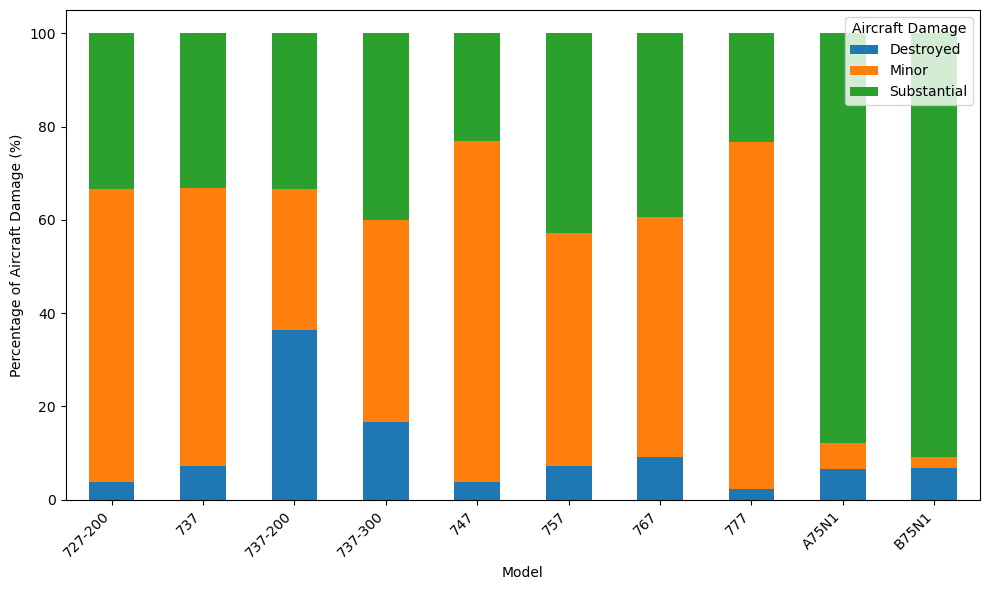

In [60]:
# Plotting the stacked bar chart
boeing_grouped_percentage.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Model')
plt.ylabel('Percentage of Aircraft Damage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Aircraft Damage')
plt.tight_layout()
plt.show()

***

- The 777 model is clearly the safest with the highest % of minor damage outof any Boeing model
- The 747 is the second safest airplane 

# Conclusions

### 
1. Boeing is the safest aircraft manufacturer
2. The 777 is the safest model based on the severity of damage during accidents
3. Overall, aircraft accidents have been on the decline for many years

***

## Limitations
1. We have limited data for certain Boeing models making inferences hard to validate

***

## Recommendations

### My recommendation is to look for Boeing made airplanes, specifically the 777 and 747 models, preferably with The Turbo Fan and Turbo Jet engine, and 3-4 engines.


#### This recommendation is supported by 4 key pieces of data found during analysis.
#### 1. Boeing has the lowest percentage of destroyed aircrafts when compared to other Makes.
#### 2. The 777 and 747 models have the lowest destroyed and substantial percentage compared to other Boeing models.
#### 3. Turbo Fan and Jet engines have the lowest destroyed percentage damage 
#### 4. Planes with 3-4 engines have the lowest percentage of destroyed / substanstial damage.